# FLIGHT FARE PREDICTION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

## Basic Analysis

First import our Excel file

Price is our Dependent Variable and it is in int

our Independent Variables are Strings

First we check the info() and drop the null rows

In [2]:
train_data = pd.read_excel('./datasets/Data_Train.xlsx')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
train_data.shape

(10683, 11)

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
train_data.dropna(inplace = True)




# Exploratory Data Analysis

#### First we make the Date_of_Journey column(string) seperated of Day and Month

['Journey_day'] for day and
['Journey_month] for month

we dont need year because the data set have the year 2019 only

In [9]:
train_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [10]:
train_data['Journey_day'] = pd.to_datetime(train_data.Date_of_Journey, format = '%d/%m/%Y').dt.day

In [11]:
train_data['Journey_month'] = pd.to_datetime(train_data['Date_of_Journey'], format =  '%d/%m/%Y').dt.month

In [12]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [13]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
 11  Journey_day      10682 non-null  int64 
 12  Journey_month    10682 non-null  int64 
dtypes: int64(3), object(10)
memory usage: 1.1+ MB


In [14]:
# we don need the Date_of_Journey columns, since we have extracted the day and month as int. so drop the column

train_data.drop(['Date_of_Journey'], axis = 1, inplace = True)

#### Now we take the Departure Time

It is similar to the Date_of_Journey.

so we exteact the Hour and Minute from Dep_Time

In [15]:
train_data['Dep_hour'] = pd.to_datetime(train_data['Dep_Time']).dt.hour
train_data['Dep_minute'] = pd.to_datetime(train_data.Dep_Time).dt.minute

#Now we can drop the Dep_Time column
train_data.drop(['Dep_Time'], axis = 1, inplace = True)

In [16]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


#### Same Procedure for the Arrival_Time

Extract the Hour and Minute from the Arrival_Time

In [17]:
train_data['Arrival_hour'] = pd.to_datetime(train_data.Arrival_Time).dt.hour
train_data['Arrival_minute'] = pd.to_datetime(train_data['Arrival_Time']).dt.minute

# Drop the Arrival_Time Column
train_data.drop(['Arrival_Time'], axis = 1, inplace = True)

In [18]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


#### Next we take the Duration column

Its is the difference between Departure and Arrival Time

In [19]:
# Converting columns into List
duration = list(train_data['Duration'])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:         # Here we checking that the duration is only with only hours or only minutes
        if 'h' in duration[i]:
            duration[i] = duration[i].strip() + ' 0m'    # Adding 0 minutes if the column have only hours
        else:
            duration[i] = '0h ' + duration[i]    # Adds 0 hour if the column have only minutes

duration_hour = []
duration_minute = []

for i in range(len(duration)):
    duration_hour.append(int(duration[i].split(sep = 'h')[0]))                  # Extracting Hours from the duration
    duration_minute.append(int(duration[i].split(sep = 'm')[0].split()[-1]))   # Extracting only the Minutes leaving the hours

In [20]:
# Adding the list to the DataFrame

train_data['Duration_hour'] = duration_hour
train_data['Duration_minute'] = duration_minute

In [21]:
# Lets drop the Duration Column

train_data.drop('Duration', axis = 1, inplace = True)

In [22]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hour,Duration_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


# Handling Categorical Data

There are two ways to handle it

1) Nominal Data --> data are not in any order --> OneHotEncoder is used

2) Ordinal Data --> data are in order --> LabelEncoder is used

In [23]:
train_data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

I am going to use catplot which is a module in seaborn.

if your machine has seaborn == 0.9.0, then skip this and move on.

if your machine has seaborn == 0.8.0, it does not have catplot

'python -mpip install seaborn==0.9.0' -- copy this command.

close the (base) terminal and paste this in the prompt and hit enter

then new version get installed..

open jupyter notebook and execute all cells

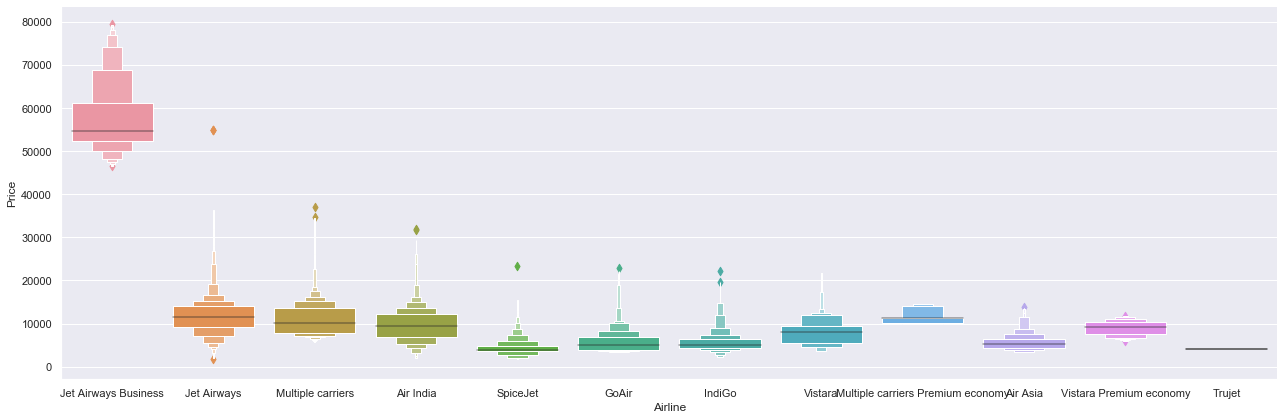

In [24]:
sns.catplot(x = 'Airline', y = 'Price', data = train_data.sort_values('Price', ascending = False), kind = 'boxen', height = 6, aspect = 3)
plt.show()

In [25]:
# As the Airline is a Nominal Categorical data, we will perforn OneHotEncoding to it

Airline = train_data[['Airline']]
Airline = pd.get_dummies(Airline, drop_first = True) # here we convert it to dummies and drop the first colomn i.e, Airline
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [26]:
train_data['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

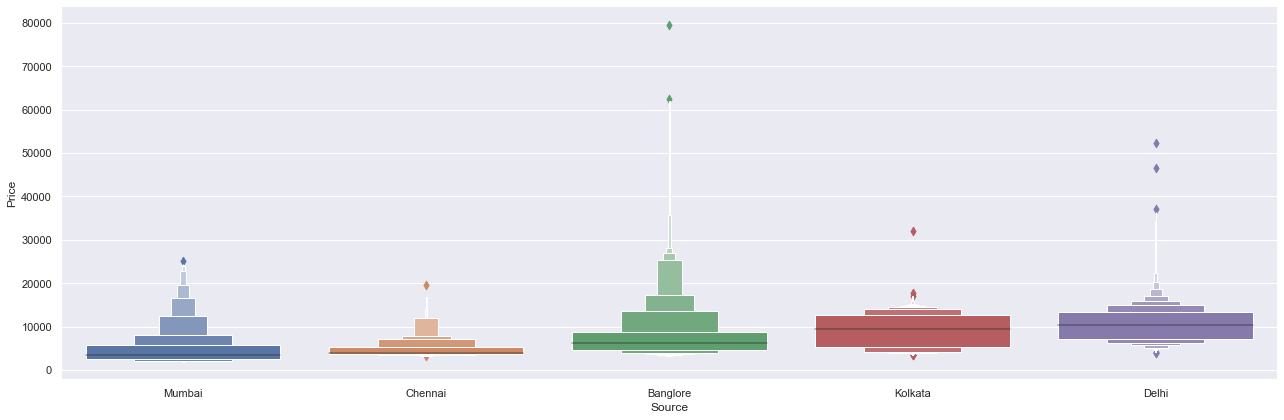

In [27]:
# lets plot between Source and Price

sns.catplot(x = 'Source', y = 'Price', data = train_data.sort_values('Price', ascending = True), kind = 'boxen', height = 6, aspect = 3)
plt.show()

In [28]:
# Here we have outliers in Banglore and Delhi

In [29]:
# Source is also Nominal Categorical data, so we perform OneHotEncoding

Source = train_data[['Source']]
Source = pd.get_dummies(Source, drop_first = True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [30]:
train_data['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

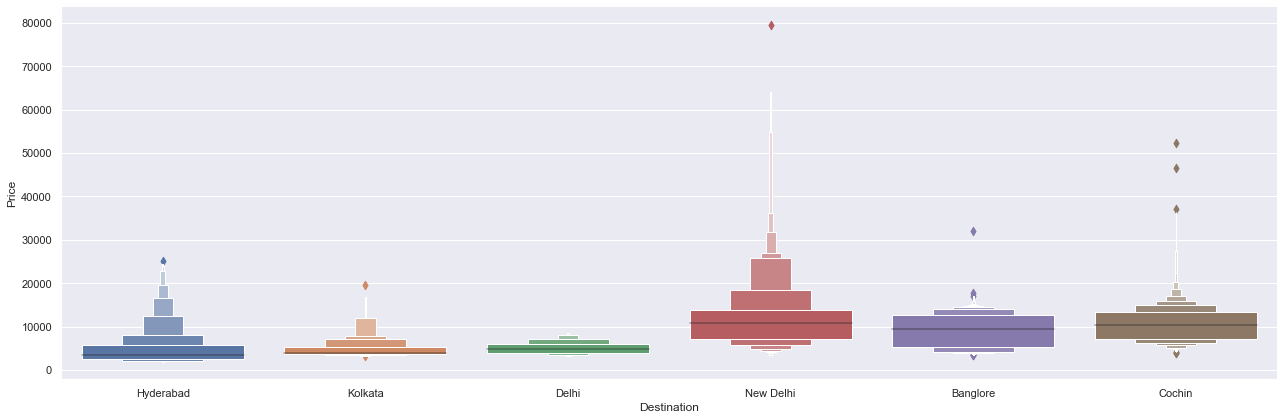

In [31]:
# Now lets plot for Destination and Price

sns.catplot(x = 'Destination', y = 'Price', data = train_data.sort_values('Price', ascending = True), kind = 'boxen', height = 6, aspect = 3)
plt.show()

In [32]:
# Here we can see that outliers in Delhi and Cochin

In [33]:
# Destination is also Nominal Categorical data, so we perform OneHotEncoding

Destination = train_data[['Destination']]
Destination = pd.get_dummies(Destination, drop_first = True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [34]:
train_data['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [35]:
train_data['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
2 Long layover                     1
1 Short layover                    1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

In [36]:
# Here Additional_Info has 83% no_info
# and the Route is related to the Total_Stops
# So we just drop the Additional_Info and Route columns

train_data.drop(['Route', 'Additional_Info'], axis = 1, inplace = True)

In [37]:
train_data.Total_Stops.value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [38]:
# As the Stops increases, Price also increases, so it is ordinal categorical data.
# so we perform Label Encoding here
# first we assign a values for the stops keys

train_data.replace({'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4}, inplace = True)

In [39]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hour,Duration_minute
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [40]:
# join all the coverted dataframes with train_data into train_data_con

train_data_con = pd.concat([train_data, Airline, Source, Destination], axis = 1)

In [41]:
train_data_con.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hour,Duration_minute,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [42]:
# we dont need the columns Airline, Source and Destination

data_train = train_data_con.drop(['Airline', 'Source', 'Destination'], axis = 1)
data_train.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hour,Duration_minute,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [43]:
data_train.shape

(10682, 30)

_________________________________________________________________________________________________________________________________

# Test Set

In [44]:
test_data = pd.read_excel('./Datasets/Test_set.xlsx')

In [45]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [46]:
test_data.shape

(2671, 10)

In [47]:
# same step we are going to repeat it. Just do all the preprocessing

print('Test Data Info')
print('-'*80)
print(test_data.info())

print()
print()

print('Null Values : ')
print('-'*80)
test_data.dropna(inplace = True)
print(test_data.isnull().sum())

print()
print()
# Exploratory Data Analysis

# Date_of_Journey
test_data['Journey_day'] = pd.to_datetime(test_data.Date_of_Journey, format = '%d/%m/%Y').dt.day
test_data['Journey_month'] = pd.to_datetime(test_data['Date_of_Journey'], format =  '%d/%m/%Y').dt.month
test_data.drop('Date_of_Journey', axis = 1, inplace = True)

# Dep_Time
test_data['Dep_hour'] = pd.to_datetime(test_data['Dep_Time']).dt.hour
test_data['Dep_minute'] = pd.to_datetime(test_data.Dep_Time).dt.minute
test_data.drop(['Dep_Time'], axis = 1, inplace = True)

# Arrival_Time
test_data['Arrival_hour'] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data['Arrival_minute'] = pd.to_datetime(test_data['Arrival_Time']).dt.minute
test_data.drop(['Arrival_Time'], axis = 1, inplace = True)

# Duration
duration = list(test_data['Duration'])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:         # Here we checking that the duration is only with only hours or only minutes
        if 'h' in duration[i]:
            duration[i] = duration[i].strip() + ' 0m'    # Adding 0 minutes if the column have only hours
        else:
            duration[i] = '0h ' + duration[i]    # Adds 0 hour if the column have only minutes

duration_hour = []
duration_minute = []

for i in range(len(duration)):
    duration_hour.append(int(duration[i].split(sep = 'h')[0]))                  # Extracting Hours from the duration
    duration_minute.append(int(duration[i].split(sep = 'm')[0].split()[-1]))   # Extracting only the Minutes leaving the hours
    
test_data['Duration_hour'] = duration_hour
test_data['Duration_minute'] = duration_minute
test_data.drop('Duration', axis = 1, inplace = True)

# Handling Categorical Data

# Airline
print('Airline')
print('-'*80)
print(test_data['Airline'].value_counts())
Airline = test_data[['Airline']]
Airline = pd.get_dummies(Airline, drop_first = True)

print()

# Source
print('Source')
print('-'*80)
print(test_data['Source'].value_counts())
Source = test_data[['Source']]
Source = pd.get_dummies(Source, drop_first = True)

print()

# Destination
print('Destination')
print('-'*80)
print(test_data['Destination'].value_counts())
Destination = test_data[['Destination']]
Destination = pd.get_dummies(Destination, drop_first = True)


# Here Additional_Info has 83% no_info
# and the Route is related to the Total_Stops
# So we just drop the Additional_Info and Route columns
test_data.drop(['Route', 'Additional_Info'], axis = 1, inplace = True)


# first we assign a values for the stops keys
test_data.replace({'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4}, inplace = True)

# Concatination
test_data_con = pd.concat([test_data, Airline, Source, Destination], axis = 1)

data_test = test_data_con.drop(['Airline', 'Source', 'Destination'], axis = 1)

print()
print()

print('Shape of our Test Data : ', data_test.shape)

Test Data Info
--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None


Null Values : 
--------------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Ti

In [48]:
data_test.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hour,Duration_minute,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [49]:
data_train.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hour,Duration_minute,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


# Feature Selection

In [50]:
data_train.shape

(10682, 30)

In [51]:
data_train.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_minute', 'Arrival_hour', 'Arrival_minute', 'Duration_hour',
       'Duration_minute', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [53]:
x = data_train.drop('Price', axis = 1)
x.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hour,Duration_minute,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [54]:
y = data_train.Price
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

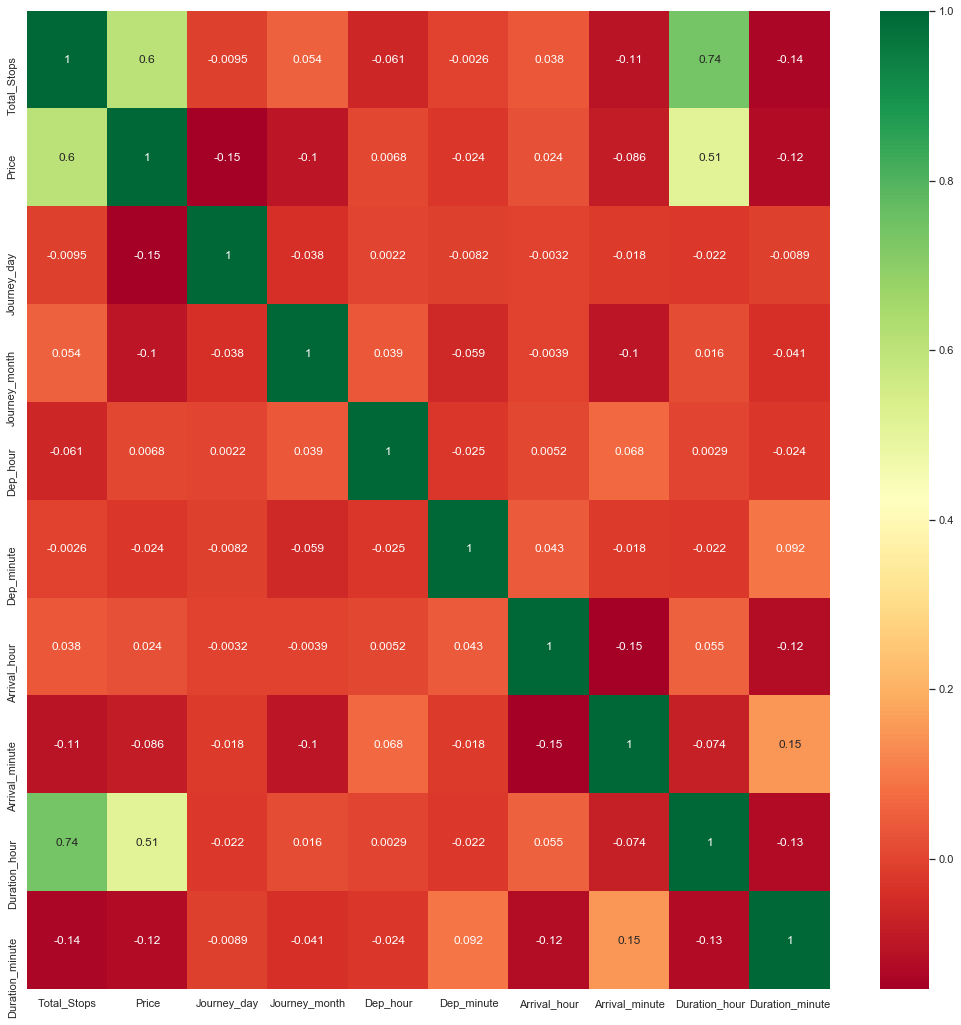

In [55]:
# Finding correlation between Independent and Dependent Attributes

plt.figure(figsize = (18, 18))
sns.heatmap(train_data.corr(), annot = True, cmap = 'RdYlGn')

plt.show()

In [58]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x, y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [59]:
selection.feature_importances_

array([2.43291911e-01, 1.43331585e-01, 5.35215284e-02, 2.39780052e-02,
       2.13337472e-02, 2.78353134e-02, 1.91352913e-02, 1.19882935e-01,
       1.73478402e-02, 8.92021299e-03, 1.68389272e-03, 1.63095153e-02,
       1.33802155e-01, 6.72018433e-02, 2.02219131e-02, 8.24122175e-04,
       3.00147710e-03, 1.11149287e-04, 4.87652671e-03, 8.15763975e-05,
       5.69384309e-04, 7.30347183e-03, 3.54103860e-03, 6.34401642e-03,
       9.26451924e-03, 1.50360662e-02, 6.05248647e-03, 4.36582839e-04,
       2.47598937e-02])

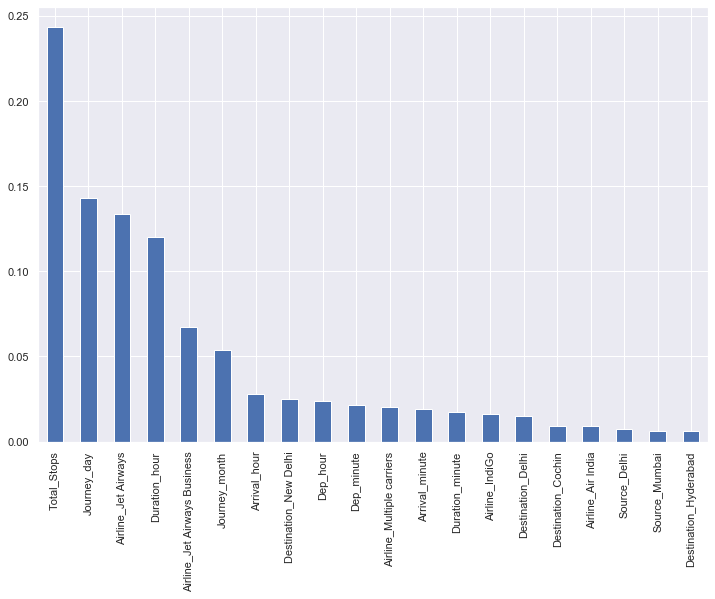

In [62]:
# plotting a graph for feature_importances_ for better visualization

plt.figure(figsize = (12, 8))
fi = pd.Series(selection.feature_importances_, index = x.columns)
fi.nlargest(20).plot(kind = 'bar')
plt.show()

-------------------------------------------------------------------------------------------------------------------------------

# Model Fitting

RandomForestRegressor 

In [63]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [65]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [66]:
rf.score(x_test, y_test)

0.8030536233744415

In [67]:
y_pred = rf.predict(x_test)

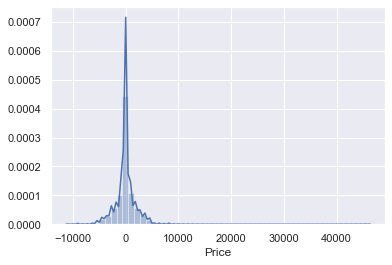

In [68]:
sns.distplot(y_test-y_pred)
plt.show()

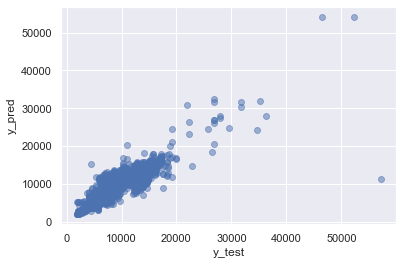

In [71]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [72]:
from sklearn import metrics

In [73]:
print('MAE : ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE : ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE :  1173.8658142576242
MSE :  4295078.789449651
RMSE :  2072.457186397261


In [74]:
metrics.r2_score(y_test, y_pred)

0.8030536233744415

-------------------------------------------------------------------------------------------------------------------------------

# Hyper Parameter Tuning

In [75]:
from sklearn.model_selection import RandomizedSearchCV

In [79]:
# Parameters in RandomForestRegressor

grid = {
    'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [int(x) for x in np.linspace(5, 30, num = 6)],
    'min_samples_split': [2, 5, 10, 15, 100],
    'min_samples_leaf': [1, 2, 5, 10]
}

In [81]:
rf_rand = RandomizedSearchCV(estimator = rf, param_distributions = grid, scoring = 'neg_mean_squared_error', n_iter = 10, cv = 5, verbose = 2, random_state = 42, n_jobs = 1)

In [83]:
rf_rand.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   6.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.8s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   7.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   6.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   6.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   7.0s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=  10.4s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.6s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.5s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.5s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.5s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.7s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  8.5min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [84]:
rf_rand.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [87]:
rf_rand.best_score_

-4050514.461208464

In [88]:
prediction = rf_rand.predict(x_test)

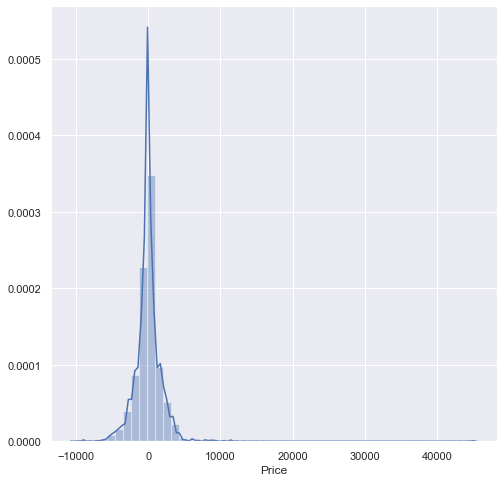

In [90]:
plt.figure(figsize = (8, 8))
sns.distplot(y_test-prediction)
plt.show()

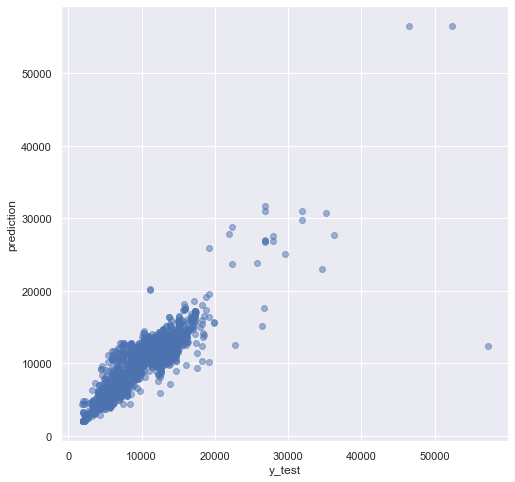

In [91]:
plt.figure(figsize = (8, 8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel('y_test')
plt.ylabel('prediction')
plt.show()

In [92]:
print('MAE : ', metrics.mean_absolute_error(y_test, prediction))
print('MSE : ', metrics.mean_squared_error(y_test, prediction))
print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE :  1149.8861724781796
MSE :  3922668.5192405325
RMSE :  1980.5727755476526


-----------------------------------------------------------------------------------------------------------------------

# Saving our Model

We have two ways to save our model

i) Pickle

ii) Joblib

In [102]:
# First way

import pickle

with open('./models/flight_price.pkl', 'wb') as f:
    pickle.dump(rf_rand, f)

In [103]:
# Second way

import joblib

joblib.dump(rf_rand, './models/flight_price.jbl')

['./models/flight_price.jbl']

In [104]:
with open('./models/flight_price.pkl', 'rb') as f:
    model_pkl = pickle.load(f)

In [105]:
a = model_pkl.predict(x_test)

In [106]:
metrics.r2_score(y_test, a)

0.8201301094952536

In [107]:
model_jbl = joblib.load('./models/flight_price.jbl')

In [108]:
b = model_jbl.predict(x_test)

In [109]:
metrics.r2_score(y_test, b)

0.8201301094952536